## Final Section: Predicting Future Data Science Salaries Using Machine Learning

As companies continue to invest heavily in AI, the role of data scientists may seem less critical, leading to speculation about salary trends in the field. Will companies continue to offer high salaries for data science roles, or will AI advancements start to reduce their perceived value?

By developing a machine learning model to predict data science salaries in the coming years, we aim to answer key questions:

1. Is data science still a growing field, or are we seeing a shift?

2. With AI taking over some responsibilities since 2022, are we on the verge of a salary decline for data scientists?

3. How can current of future data scientists use this prediction to negotiate competitive salaries in the future?

The results will shed light on the future trajectory of data science careers and help businesses understand how compensation may evolve.

### Import the Libraries

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
import xgboost as xgb
from sklearn.model_selection import train_test_split


### Import the clean Data and Feature Engineering steps

In [41]:
salary_data_new=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Graded Assignment/Final Capstone Project/salary_data_new.csv")

In [42]:
salary_data_new.head(5)

,job_title,employment_type,experience_level,salary,salary_currency,company_location,salary_in_usd,employee_residence,company_size,work_year
0,Staff Data Analyst,Contract,Entry,60000,Canadian Dollar,Canada,44753,Canada,Large,2020
1,AI Engineer,Full-Time,Entry,35000,United States Dollar,Germany,35000,Croatia,Medium,2023
2,AI Developer,Full-Time,Senior,50000,Euro,Italy,53984,Italy,Small,2023
3,Machine Learning Engineer,Full-Time,Senior,226600,United States Dollar,United States,226600,United States,Medium,2023
4,Machine Learning Engineer,Full-Time,Senior,140100,United States Dollar,United States,140100,United States,Medium,2023


1. Most predicting variables are non numerical and we do need to change the ones we plan on using to numerical before going further.

2. "salary" column is just another version of "salary_in_uds" and thefore needs to be left out when creating the model.

3. Based on the visulization, "employment_type" and "employee_residence" have no impact on salary and therefore will not be part of the ML model

##### To conclude we keep:  Job Title, Experience Level, Company Location, Company Size and work_Year; with salary_in_usd as our predicted variable

#### Handling categorical Data: Job Title, Experience Level, Company_Location, Compsany_size

In [43]:
data2=salary_data_new.copy()

In [44]:
# we drop unnecessary columns for the rest of the analysis
data2=data2.drop(['employment_type','salary_currency','salary','employee_residence'],axis=1)

In [45]:
data2.head(5)

,job_title,experience_level,company_location,salary_in_usd,company_size,work_year
0,Staff Data Analyst,Entry,Canada,44753,Large,2020
1,AI Engineer,Entry,Germany,35000,Medium,2023
2,AI Developer,Senior,Italy,53984,Small,2023
3,Machine Learning Engineer,Senior,United States,226600,Medium,2023
4,Machine Learning Engineer,Senior,United States,140100,Medium,2023


##### Ordinal categorical columns: Experience Level and company size

In [46]:
name = [['Entry', 'Mid', 'Senior', 'Executive'],
        ['Small', 'Medium', 'Large']]

ordinal= OrdinalEncoder(categories = name)
data2[['experience_level', 'company_size']] = ordinal.fit_transform(data2[['experience_level','company_size']])


In [47]:
data2

,job_title,experience_level,company_location,salary_in_usd,company_size,work_year
0,Staff Data Analyst,0.0,Canada,44753,2.0,2020
1,AI Engineer,0.0,Germany,35000,1.0,2023
2,AI Developer,2.0,Italy,53984,0.0,2023
3,Machine Learning Engineer,2.0,United States,226600,1.0,2023
4,Machine Learning Engineer,2.0,United States,140100,1.0,2023
...,...,...,...,...,...,...
38368,Data Scientist,2.0,United States,412000,2.0,2020
38369,Principal Data Scientist,1.0,United States,151000,2.0,2021
38370,Data Scientist,0.0,United States,105000,0.0,2020
38371,Business Data Analyst,0.0,United States,100000,2.0,2020


#### Nominal categorical Data: Job_title and Company_location

In [48]:
names = ['job_title', 'company_location']

hotenc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
encoded = pd.DataFrame(hotenc.fit_transform(data2[names]), 
                                columns = hotenc.get_feature_names_out(names))
encoded.index = data2.index
data2 = data2.drop(names, axis = 1)
data2 = pd.concat([data2, encoded], axis = 1)

/home/angelo/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [49]:
data2.head(2)

,experience_level,salary_in_usd,company_size,work_year,job_title_AI Architect,job_title_AI Data Scientist,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,...,company_location_Switzerland,company_location_TH,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_VE,company_location_VN
0,0.0,44753,2.0,2020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,35000,1.0,2023,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Before diving into the creation of the model, let's answer the first question ?
1. Is data science still a growing field, or are we seeing a shift?


In [50]:
DAT=salary_data_new[['work_year','job_title']].groupby('work_year').count()

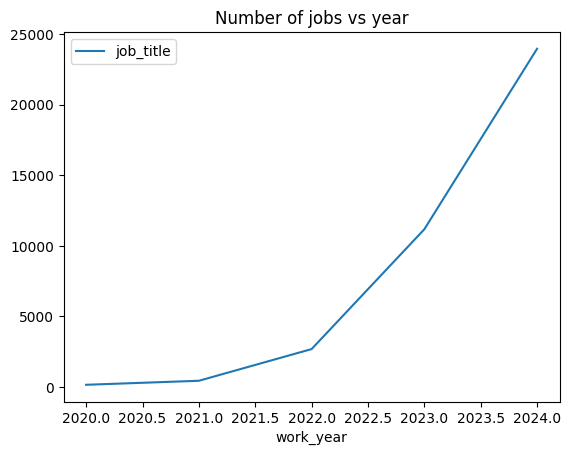

In [51]:
DAT.plot()
plt.title('Number of jobs vs year')
plt.show()

Answer: No, there is still a growing number the data science job and the demand remains robust.

## Model Implementation

In [52]:
data2.shape

(38373, 348)

Well, we get a pretty robust data now, 349 columns. Creating a ML model incorporating all those columns is perhaps the safest idea the get the best results but might also lead to overfitting. We are proceed as follows.

1. For each model we implement, we perform the evalation with all the features.
2. We will also perform feature selection to select the most important feature and implement a second model with those features.
3. Compare the results

### XGBOOST

#### Split the data into training and testing

In [98]:
# Splitting the dataset
X=data2.drop('salary_in_usd', axis=1)
y=data2['salary_in_usd']

#### Are they any outliers?

{'whiskers': [<matplotlib.lines.Line2D at 0x7164e55f64d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7164e55f6a70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7164e55f6200>],
 'medians': [<matplotlib.lines.Line2D at 0x7164e55f7010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7164e55f72e0>],
 'means': []}

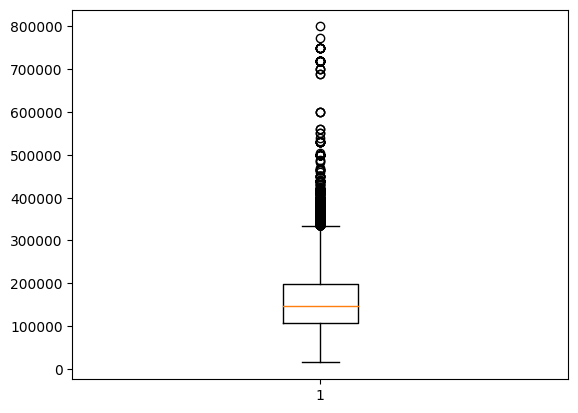

In [99]:
plt.boxplot(y)

Answer: Yes, they are. We will better limit the impact of the outliers because keeping thm as they are will impact the performance of the model.

##### We will use the winsorization technique
Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

In [100]:
from scipy.stats.mstats import winsorize
y = winsorize(y, (0, 0.018))

{'whiskers': [<matplotlib.lines.Line2D at 0x7164def753c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7164def75960>,
 'boxes': [<matplotlib.lines.Line2D at 0x7164def750f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7164def75f00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7164def761d0>],
 'means': []}

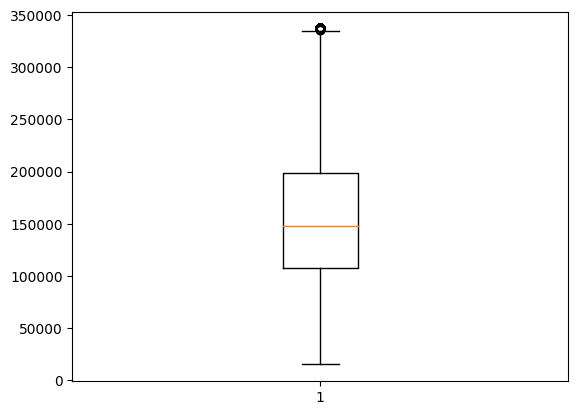

In [101]:
plt.boxplot(y)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DMatrix format (XGBoost format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

NB: DMatrix is a internal data structure that used by XGBoost which is optimized for both memory efficiency and training speed

#### Training the model on the training data and evaluating it on the test set

In [103]:
params = {
    'objective': 'reg:squarederror',  # For regression tasks (change to 'binary:logistic' for classification)
    'max_depth': 6,
    'eta': 0.1,  # learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'
}

# Train the model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)


[0]	test-rmse:65559.92727
[1]	test-rmse:64121.43796
[2]	test-rmse:62925.08576
[3]	test-rmse:61930.08005
[4]	test-rmse:61213.83045
[5]	test-rmse:60587.52228
[6]	test-rmse:59954.88611
[7]	test-rmse:59402.40627
[8]	test-rmse:58932.71774
[9]	test-rmse:58571.57121
[10]	test-rmse:58255.01819
[11]	test-rmse:57990.05090
[12]	test-rmse:57727.76750
[13]	test-rmse:57494.17475
[14]	test-rmse:57286.18043
[15]	test-rmse:57134.41131
[16]	test-rmse:56991.74951
[17]	test-rmse:56861.82949
[18]	test-rmse:56757.45252
[19]	test-rmse:56659.76658
[20]	test-rmse:56576.36327
[21]	test-rmse:56476.64700
[22]	test-rmse:56394.53064
[23]	test-rmse:56307.78742
[24]	test-rmse:56236.12603
[25]	test-rmse:56171.29925
[26]	test-rmse:56093.66745
[27]	test-rmse:56013.39814
[28]	test-rmse:55954.36982
[29]	test-rmse:55921.02512
[30]	test-rmse:55876.50664
[31]	test-rmse:55842.96316
[32]	test-rmse:55791.58127
[33]	test-rmse:55744.76580
[34]	test-rmse:55703.45823
[35]	test-rmse:55672.41117
[36]	test-rmse:55634.12007
[37]	test-r

#### Feature importance and selection and compare both models
We select the top 10 features to truly see what impact data science salaries the most

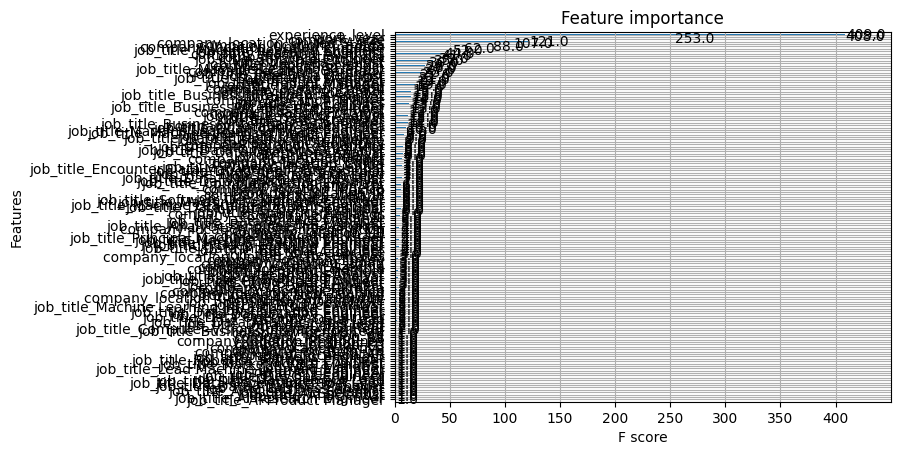

Top features: ['experience_level', 'work_year', 'company_size', 'company_location_United States', 'company_location_Canada', 'company_location_United Kingdom', 'job_title_Machine Learning Engineer', 'job_title_Research Scientist', 'company_location_Australia', 'company_location_India']


In [104]:
# Plot feature importance

xgb.plot_importance(model)
plt.show()

# Get feature importance values
importance = model.get_score(importance_type='weight')
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Select top features
top_features = [k for k, v in sorted_importance[:10]]  # Adjust number for more/less features
print(f"Top features: {top_features}")


#### After learning about the most important features, let's dig deep and fine tune our model. By the end of the day, we want a model that performs at its best ( with the best hyperparameters)

#### Fine tuning step

In [105]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Fine-tuning with GridSearchCV
xgb_model = XGBRegressor()
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 300, 'subsample': 1.0}


 #### Now we retrive the best parameters and use it for our new model.

In [106]:
# we will call the new model "model_final"
model_final = xgb.train(best_params, dtrain, num_boost_round=100, evals=[(dtest, 'test')], early_stopping_rounds=10)


[0]	test-rmse:63749.15489
[1]	test-rmse:61270.86389
[2]	test-rmse:59595.77391
[3]	test-rmse:58490.60953
[4]	test-rmse:57834.76996
[5]	test-rmse:57306.45525
[6]	test-rmse:56823.85289
[7]	test-rmse:56438.37232
[8]	test-rmse:56148.42743
[9]	test-rmse:55948.80068
[10]	test-rmse:55774.83637


/home/angelo/.local/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:44:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[11]	test-rmse:55612.43716
[12]	test-rmse:55494.30522
[13]	test-rmse:55363.05653
[14]	test-rmse:55288.36730
[15]	test-rmse:55224.18660
[16]	test-rmse:55173.49529
[17]	test-rmse:55119.05974
[18]	test-rmse:55059.54943
[19]	test-rmse:55009.48894
[20]	test-rmse:54960.71078
[21]	test-rmse:54919.09725
[22]	test-rmse:54870.95775
[23]	test-rmse:54837.01963
[24]	test-rmse:54814.42697
[25]	test-rmse:54781.99505
[26]	test-rmse:54755.95648
[27]	test-rmse:54737.69883
[28]	test-rmse:54712.61059
[29]	test-rmse:54691.70411
[30]	test-rmse:54672.84971
[31]	test-rmse:54646.76529
[32]	test-rmse:54621.62503
[33]	test-rmse:54605.70135
[34]	test-rmse:54594.15623
[35]	test-rmse:54572.43375
[36]	test-rmse:54545.42108
[37]	test-rmse:54547.43952
[38]	test-rmse:54534.62377
[39]	test-rmse:54517.61904
[40]	test-rmse:54506.54841
[41]	test-rmse:54488.97951
[42]	test-rmse:54480.00768
[43]	test-rmse:54473.60107
[44]	test-rmse:54456.87717
[45]	test-rmse:54438.95654
[46]	test-rmse:54423.00852
[47]	test-rmse:54415.71029
[

#### Evaluate Model Performance
After fine-tuning, evaluate the model using the key metrics 

In [107]:
from sklearn.metrics import mean_squared_error

# Predict and evaluate
y_pred = model_final.predict(dtest)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 54132.25683162503


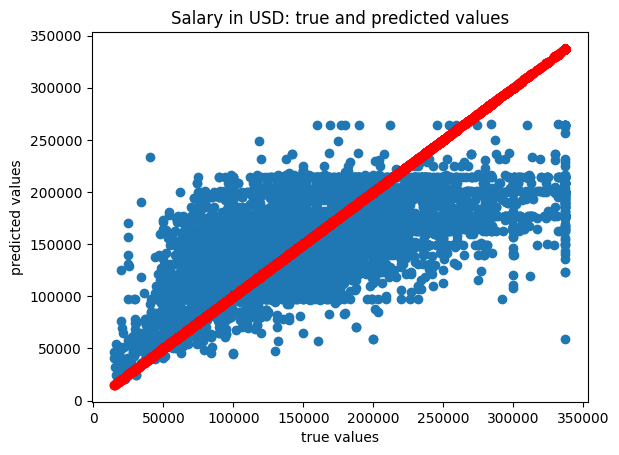

In [108]:
plt.scatter(y_test, y_pred)
plt.scatter(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Salary in USD: true and predicted values")
plt.show()

### Random Prediction

Because I intend to be working for a company in 2025, what will be the price of an entry level data scientist based in USA and working for a company in the USA in 2025. The company is a medium size company?

In [109]:
X_test.head(2)

,experience_level,company_size,work_year,job_title_AI Architect,job_title_AI Data Scientist,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,job_title_AI Research Engineer,...,company_location_Switzerland,company_location_TH,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_VE,company_location_VN
21055,2.0,1.0,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13137,1.0,1.0,2024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [194]:
# Finding the index of the Data scientist Job title
X_test.columns[119]

'job_title_Data Scientist'

In [199]:
X.shape

(38373, 347)

In [206]:
A=pd.DataFrame(np.zeros(347), index=X.columns.values).T

In [207]:
A

,experience_level,company_size,work_year,job_title_AI Architect,job_title_AI Data Scientist,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,job_title_AI Research Engineer,...,company_location_Switzerland,company_location_TH,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_VE,company_location_VN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [208]:
A['experience_level']=0 # Experience level: Entry
A['company_size']=1 # company size: Medium
A['work_year']=2025 # work year
A['company_location_United States']=1 # company located in the USA
A['job_title_Data Scientist']=1 # Job title: Data scientist
dA = xgb.DMatrix(A)

In [211]:
predicted_salary=model_final.predict(dA)
print("The predicted salary of an entry level data scientist in 2025, working in a medium company in the USA is: USD",predicted_salary[0])

The predicted salary of an entry level data scientist in 2025, working in a medium company in the USA is: USD 121190.08
